<a href="https://colab.research.google.com/github/kayecandy/csmodel/blob/master/Case%20Study/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# The Datasets

## World Happiness Report

This case study is heavily based on data from this report. The World Happiness Report initiative started at 2012 - the first to rank countries by how their populations feel; inspired by the fact that traditional metrics such as GDP, household income and unemployment rate does not seem to be a sufficient measure for people's happines, and *life ratings* which is apparent in uprising Arab countries where the economy was flourishing with a rise in their GDP's, however the rating for the population's lives trended downward.


It now has a total of 8 reports - one for each year until 2020 - and has since then been a primary source of global data on life satisfaction rankings.


**Our Sources:**
* The primary dataset used in this case study is from this [kaggle post](https://www.kaggle.com/mathurinache/world-happiness-report).

* The pdf versions (8 reports from 2012-2020) of the reports and other downloadables can be found [here](https://worldhappiness.report/archive/?utm_source=workplace-newsletter&utm_medium=email&utm_campaign=WorkplaceNewsletter_Test-A_March_031919&utm_content=downloadexitpp-CTA-6)

* Useful FAQ's regarding the World Happiness Report is available [here](https://worldhappiness.report/faq/)

* An overview of this report can also be found in this [article from Gallup](https://www.gallup.com/analytics/247355/gallup-world-happiness-report.aspx)



### In Detail...
----

The dataset contains 153 **observations** (rows) across 20 **variables** (columns). Each observation represents the summarized ratings/scores per country included in the study; thus, there are 153 total countries.

> **_Note:_** _This dataset is derived from several other sources, the Gallup World Poll being it's major source of data, and contains only the already summarized / derived / pre-calculated data per country. Description on data collection method will be elaborated per variable if applicable._

For this case study, the 2020 dataset would be used. The following are the variables available in the dataset:





**Basic information:**



* **`Country name`**: 

    Name of the country

* **`Regional indicator`**:

    Region where the country belongs to.

    _Possible values are:_ `Western Europe`, `North America and ANZ`, `Middle East and North Africa`, `Latin America and Caribbean`, `Central and Eastern Europe`, `East Asia`, `Southeast Asia`, `Commonwealth of Independent States`, `Sub-Saharan Africa`, `South Asia`
   

* **`Ladder score`**: 

    Overall happiness score of a country. This is represented by a [Cantril Scale/Ladder](https://news.gallup.com/poll/122453/understanding-gallup-uses-cantril-scale.aspx) which measures the quality of life from `0-10`. A score of `0-3` would categorize a country as _'suffering'_, `4-6` as _'struggling'_, and `7-`10` as _'thriving'_.

    Data for this is derived from the national average of the Gallup World Poll question _"Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?"_



* **`Standard error of ladder score`** 

    A buffer for standard error with 95% confidence interval


* **`upperwhisker`** _(Not used for this case study.)_ 

    This is for creating a boxplot on the raw data of `ladder score`


* **`lowerwhisker`** _(Not used for this case study.)_ 

    This is for creating a boxplot on the raw data of `ladder score`




----


**Variables that may affect the happiness score (ladder score):**


* **`Logged GDP per capita`**: 

    This data was derived from the _World Development Indicators (WDI)_ released by the _World Bank_ on November 28, 2019

* **`Social support`**: 

    The national average of binary responses to the following `Gallup World Poll` question _"If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?"_


* **`Healthy life expectancy`**: 

    This is the estimated number of years that the country's population has in a state of 'good health'.
    
    This data is constructed from the _World Health Organization (WHO) Global Health Observatory_ data repository
    
* **`Freedom to make life choices`**: 

    The national average of binary responses to the following `Gallup World Poll` question: _“Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”_


* **`Generosity`**

    The residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita



* **`Perceptions of corruption`**: 

    The national average of binary responses to the following `Gallup World Poll` questions:
    
    * _“Is corruption widespread throughout the government or not?”_

    * _“Is corruption widespread within businesses or not?”_



> _**Note:**_
>
> Binary responses consists of either a `yes=1` or a `no=0`_


----


**Dystopia:** 

_Dystopia_ is a hypothetical country which has all the lowest score for each of the 6 variables that may affect happiness as presented above. This is for the purpose of benchmarking a country's ladder score so that no country would perform worse than this made-up country. 



* **`Ladder score in Dystopia`**

    This is a constant value of 1.97 - the ladder score of the made-up country _Dystopia_


* **`Dystopia + Residual`**

    This is the sum of the **`Ladder score in Dystopia`** and a variable _'residuals'_ which represents unexplained components that affects ladder score
    



----

**Explained by variables:**

These are pre-calculated values to represent the estimated effect of the 6 variables that may affect happiness to a country's ladder score (ie. an estimate of how much of the ladder score is affected by a variable)

These are calculated based on how much a country performed better than dystopia per variable multiplied by a normalizing coefficient. The report uses the concept of dystopia for this purpose: that since all countries would perform better than it in all 6 variables, the difference between a country's performance in a variable and the dystopian performance on the same variable would always be a positive number, ensuring that a variable would always contribute a portion to the overall happiness score.







### Gallup World Poll: The raw data

_Gallup World Poll_ is the primary source in which the data in this report was derived from. The latest version (2020) uses data from 2017-2019. It's sample size is typically at least 1000 annually per country



Read more on Gallup World Poll Methodology [here](https://news.gallup.com/poll/105226/world-poll-methodology.aspx)

**Reading the dataset:**

In [50]:
happiness_df = pd.read_csv('./dataset/World Happiness Report/2020.csv')
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

## WHO Suicide Statistics Dataset

The case study will also be using data from WHO Suicide Statistics. This dataset has numbers for suicide cases from 1979 to 2016, by country, year, age groups and sex. All of this is contained in one file with a few columns. This dataset will mainly serve to add to suicide numbers to each observation in the World Happiness Report's dataset.


### In Detail

The dataset contains 43776 observations (rows) across 6 variables (columns). Each observation represents a number of suicides for one demographic in a country over a year. There are observations for 141 different countries.

* **`Country`**: Name of the country
* **`Year`**: Year the observation was recorded
* **`Sex`**: Sex of the victims
* **`Age`**: Age group of victims
* **`Number of suicides`**: Number of suicides recorded
* **`Population`**: Number of all living people in group

Reading the dataset:

In [51]:
suicide_df = pd.read_csv('./dataset/WHO Suicide Statistics/who_suicide_statistics.csv')
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.5+ MB


# Data Cleaning

## World Happiness Report

Since this dataset alone contains only the summary from various sources, this has already been pre-cleaned.

## WHO Suicide Statistics

### Nan values
For values that are `NaN`, we replace with 0 instead to avoid computation errors.

In [52]:
suicide_df = suicide_df.fillna(0)

### Drop countries with `0` population

In [53]:
suicide_df = suicide_df[suicide_df['population'] > 0]

### Add a `suicide_rate` column for a normalized representation of suicide number per country

In [54]:
suicide_df['suicide_rate'] = suicide_df['suicides_no'] / suicide_df['population']

suicide_df_agg = suicide_df.groupby(['country']).sum()
suicide_df_agg['suicide_rate'] = suicide_df_agg['suicides_no'] / suicide_df_agg['population']

suicide_df_agg.sort_values('suicide_rate', ascending=False).head(5)

,year,suicides_no,population,suicide_rate
country,,,,
Lithuania,839544,42166.0,1.116514e+08,0.000378
Hungary,910860,130018.0,3.687719e+08,0.000353
Sri Lanka,382596,80747.0,2.488106e+08,0.000325
Russian Federation,862920,1500992.0,4.868343e+09,0.000308
Latvia,862920,24861.0,8.093534e+07,0.000307


# Exploratory Questions

_FOCUS: Prove/show in graph economically successful countries but have lower happines score_
1. What possible factors are there for the downtrend of happiness score in economically succesful countries

  - sample are middle eastern countries
  - Assume economical success similar to gdp

_FOCUS: Countries per region_
2. How similar is each country per region, based on each variable from the first question? 

  - group countries per region, rank score for each variable
  - groop countries per region, rank the countries and speculate why they're higher up

    *Second question is quite interesting; please select the appropriate methods to be able to answer it. Also, the question needs to be more defined. What do you mean by "conditions"? I would recommend that you don't limit yourself with this dataset and try to find additional sources of information regarding the different countries from other dataset. Then, you might be able to find more interesting relationships and patterns between the happiness score and certain properties of each country.*

_FOCUS: Relation to suicide rate_
3. How do the amount of suicides in each country relate to the happiness scores? Does being in a happy country necessarily mean there are less suicides?
    

Note on Exploratory Data Analysis

1. Filter out country - dataset same countries

2. Summarize per year

3. Suicide - rank by country and age

4. compare rankings per year

5. scatterplot ladder score/suicide number; color group by region

---



# Exploratory Data Analysis

*Perform  data  cleaning  (if  needed)  and  perform exploratory  data  analysis. This  part  of  the  project  should  include  numerical summaries and visualizations whenever appropriate. Each visualization should be  accompanied  by  a  brief  explanation.Theexploratory  data  analysis  should guide you in formulating the research questions in the next step.You  should  perform  exploratory  data  analysis  comprehensively  to  gain  a  good understanding ofyour dataset. However, for the Notebook, please choose only 3 of the most interesting exploratory questions that you did for your dataset. For these   exploratory   questions,   please   include   numerical   summaries   and visualizations  that  address  these  questions along  with  textual  descriptions  of your processes and findings.*

In [55]:
happiness_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


## Does economic success mean happier people?

In [56]:
happiness_gdp_df = happiness_df[['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita']]
happiness_gdp_df.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita
0,Finland,Western Europe,7.8087,10.639267
1,Denmark,Western Europe,7.6456,10.774001
2,Switzerland,Western Europe,7.5599,10.979933
3,Iceland,Western Europe,7.5045,10.772559
4,Norway,Western Europe,7.4880,11.087804


## How similar is each country per region, based on each variable from the first question? 

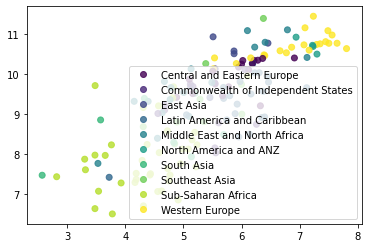

In [57]:
labels, index = np.unique(happiness_df['Regional indicator'], return_inverse=True)

fig, ax = plt.subplots()
sc = ax.scatter(happiness_df['Ladder score'], happiness_df['Logged GDP per capita'], marker = 'o', c = index, alpha = 0.8)
ax.legend(sc.legend_elements()[0], labels)

plt.show()

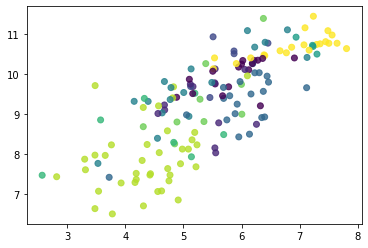

In [58]:
labels, index = np.unique(happiness_df['Regional indicator'], return_inverse=True)

fig, ax = plt.subplots()
sc = ax.scatter(happiness_df['Ladder score'], happiness_df['Logged GDP per capita'], marker = 'o', c = index, alpha = 0.8)

plt.show()

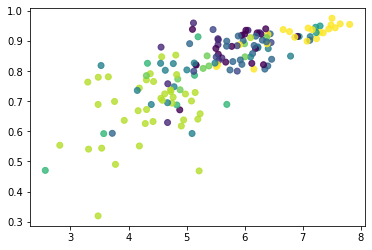

In [59]:
labels, index = np.unique(happiness_df['Regional indicator'], return_inverse=True)

fig, ax = plt.subplots()
sc = ax.scatter(happiness_df['Ladder score'], happiness_df['Social support'], marker = 'o', c = index, alpha = 0.8)

plt.show()

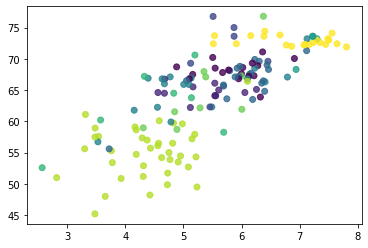

In [60]:
labels, index = np.unique(happiness_df['Regional indicator'], return_inverse=True)

fig, ax = plt.subplots()
sc = ax.scatter(happiness_df['Ladder score'], happiness_df['Healthy life expectancy'], marker = 'o', c = index, alpha = 0.8)

plt.show()

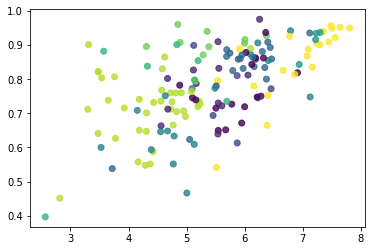

In [61]:
labels, index = np.unique(happiness_df['Regional indicator'], return_inverse=True)

fig, ax = plt.subplots()
sc = ax.scatter(happiness_df['Ladder score'], happiness_df['Freedom to make life choices'], marker = 'o', c = index, alpha = 0.8)

plt.show()

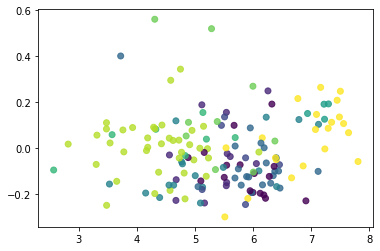

In [62]:
labels, index = np.unique(happiness_df['Regional indicator'], return_inverse=True)

fig, ax = plt.subplots()
sc = ax.scatter(happiness_df['Ladder score'], happiness_df['Generosity'], marker = 'o', c = index, alpha = 0.8)

plt.show()

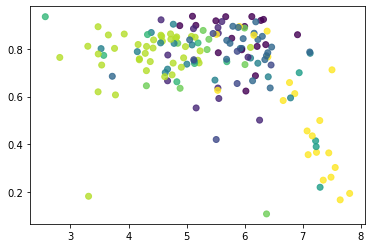

In [63]:
labels, index = np.unique(happiness_df['Regional indicator'], return_inverse=True)

fig, ax = plt.subplots()
sc = ax.scatter(happiness_df['Ladder score'], happiness_df['Perceptions of corruption'], marker = 'o', c = index, alpha = 0.8)

plt.show()

## How do the amount of suicides in each country relate to the happiness scores? Does being in a happy country necessarily mean there are less suicides?

The dataset for the WHO Suicide Statistics will be stored under suicide_df. For the purpose of this study, the suicide counts don't need to be separated by sex and age group, therefore the dataset needs cleaning. 

In [64]:
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicide_rate
0,Albania,1985,female,15-24 years,0.0,277900.0,0.0
1,Albania,1985,female,25-34 years,0.0,246800.0,0.0
2,Albania,1985,female,35-54 years,0.0,267500.0,0.0
3,Albania,1985,female,5-14 years,0.0,298300.0,0.0
4,Albania,1985,female,55-74 years,0.0,138700.0,0.0


In [65]:
suicides_score_df = happiness_df.merge(suicide_df_agg, left_on='Country name', right_on='country', how='inner')

suicides_score_df.sort_values(by=['suicide_rate'], ascending=False)
suicides_score_df[['Country name', 'Regional indicator', 'Ladder score', 'suicide_rate']].sort_values(by=['suicide_rate'], ascending=False).head(n=10)

,Country name,Regional indicator,Ladder score,suicide_rate
36,Lithuania,Central and Eastern Europe,6.2155,0.000378
48,Hungary,Central and Eastern Europe,6.0004,0.000353
75,Sri Lanka,South Asia,4.3270,0.000325
51,Latvia,Central and Eastern Europe,5.9500,0.000307
29,Slovenia,Central and Eastern Europe,6.3634,0.000285
46,Estonia,Central and Eastern Europe,6.0218,0.000279
45,Kazakhstan,Commonwealth of Independent States,6.0579,0.000252
74,Ukraine,Commonwealth of Independent States,4.5607,0.000240
61,Belarus,Commonwealth of Independent States,5.5399,0.000237
55,Japan,East Asia,5.8708,0.000216


In [66]:
suicides_score_df['normalized_rate'] = (suicides_score_df['suicide_rate']-suicides_score_df['suicide_rate'].min())/(suicides_score_df['suicide_rate'].max()-suicides_score_df['suicide_rate'].min())
suicides_score_df[['Country name', 'Regional indicator', 'Ladder score', 'normalized_rate']].sort_values(by=['normalized_rate'], ascending=False).head(n=10)

,Country name,Regional indicator,Ladder score,normalized_rate
36,Lithuania,Central and Eastern Europe,6.2155,1.000000
48,Hungary,Central and Eastern Europe,6.0004,0.933407
75,Sri Lanka,South Asia,4.3270,0.858980
51,Latvia,Central and Eastern Europe,5.9500,0.812896
29,Slovenia,Central and Eastern Europe,6.3634,0.753885
46,Estonia,Central and Eastern Europe,6.0218,0.737734
45,Kazakhstan,Commonwealth of Independent States,6.0579,0.665322
74,Ukraine,Commonwealth of Independent States,4.5607,0.634800
61,Belarus,Commonwealth of Independent States,5.5399,0.626405
55,Japan,East Asia,5.8708,0.570967


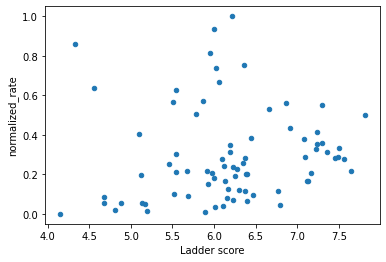

In [67]:
ax1 = suicides_score_df.plot.scatter(x='Ladder score', y='normalized_rate')

Based on the results displayed on the graph, it would seem that despite being "happier," some countries have higher rates of suicide. It seems that higher happiness scores do not mean lower occurences of suicide in a country.

# Research Questions

*Come up with at least 2 research questions that you want
to answer using the dataset. The 2 research questions should be answerable
using different methods (i.e., do not choose 2 questions that could be answered
using the exact same approach but just changing some of the parameters). You
should select research questions that are within the scope of the dataset you are
working on. For each research question, you must indicate why this question is
of interest to you and the community.*

## Are there any associations found in the cantril ladder and social variables described on the World Happiness Report?

In [68]:
happiness_df['hopeless'] = 0
happiness_df['depressed'] = 0
happiness_df['suffering'] = 0
happiness_df['struggling'] = 0
happiness_df['coping'] = 0
happiness_df['just ok'] = 0
happiness_df['doing well'] = 0
happiness_df['blooming'] = 0
happiness_df['moving'] = 0
happiness_df['prospering'] = 0

happiness_df['suffering area'] = 0
happiness_df['struggling area'] = 0
happiness_df['thriving area'] = 0

happiness_df.loc[happiness_df['Ladder score'] <= 1.0, 'hopeless'] = 1
happiness_df.loc[(happiness_df['Ladder score'] > 1.0) & (happiness_df['Ladder score'] <= 2.0), 'depressed'] = 1
happiness_df.loc[(happiness_df['Ladder score'] > 2.0) & (happiness_df['Ladder score'] <= 3.0), 'suffering'] = 1
happiness_df.loc[(happiness_df['Ladder score'] > 3.0) & (happiness_df['Ladder score'] <= 4.0), 'struggling'] = 1
happiness_df.loc[(happiness_df['Ladder score'] > 4.0) & (happiness_df['Ladder score'] <= 5.0), 'coping'] = 1
happiness_df.loc[(happiness_df['Ladder score'] > 5.0) & (happiness_df['Ladder score'] <= 6.0), 'just ok'] = 1
happiness_df.loc[(happiness_df['Ladder score'] > 6.0) & (happiness_df['Ladder score'] <= 7.0), 'doing well'] = 1
happiness_df.loc[(happiness_df['Ladder score'] > 7.0) & (happiness_df['Ladder score'] <= 8.0), 'blooming'] = 1
happiness_df.loc[(happiness_df['Ladder score'] > 8.0) & (happiness_df['Ladder score'] <= 9.0), 'moving'] = 1
happiness_df.loc[(happiness_df['Ladder score'] > 9.0) & (happiness_df['Ladder score'] <= 10.0), 'prospering'] = 1

happiness_df.loc[happiness_df['Ladder score'] <= 3.0, 'suffering area'] = 1
happiness_df.loc[(happiness_df['Ladder score'] > 3.0) & (happiness_df['Ladder score'] <= 6.0), 'struggling area'] = 1
happiness_df.loc[happiness_df['Ladder score'] > 6.0, 'thriving area'] = 1

association_df = happiness_df[['hopeless', 'depressed', 'suffering', 'struggling', 'coping', 'just ok', 'doing well', 'blooming', 'moving', 'prospering', 'suffering area', 'struggling area', 'thriving area']]

association_df.head()
#association_df

,hopeless,depressed,suffering,struggling,coping,just ok,doing well,blooming,moving,prospering,suffering area,struggling area,thriving area
0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0,0,0,1,0,0,0,0,0,0,0,1,0
149,0,0,0,1,0,0,0,0,0,0,0,1,0
150,0,0,0,1,0,0,0,0,0,0,0,1,0
151,0,0,1,0,0,0,0,0,0,0,1,0,0


In [69]:
association_df['freedom_bin'] = 0
association_df['social_support_bin'] = 0
association_df['corruption_bin'] = 0

association_df.loc[happiness_df['Freedom to make life choices'] > 0.5, 'freedom_bin'] = 1
association_df.loc[happiness_df['Social support'] > 0.5, 'social_support_bin'] = 1
association_df.loc[happiness_df['Perceptions of corruption'] > 0.5, 'corruption_bin'] = 1

association_df[['freedom_bin', 'social_support_bin', 'corruption_bin']].head()

c:\users\rafael\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\rafael\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\rafael\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,freedom_bin,social_support_bin,corruption_bin
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,1
4,1,1,0


### Using Association Rules

Association Rules is an "if-then" correlation technique that helps in showing us the probability of correlations within the data. Having a high confidence value means that there is a high chance of encountering other data points given the presence of a certain data point.

In [70]:
from rule_miner import RuleMiner
rule_miner = RuleMiner(85, 0.6)

frequent_itemsets = rule_miner.get_frequent_itemsets(association_df)
print(frequent_itemsets)

[['struggling area', 'social_support_bin', 'corruption_bin', 'freedom_bin'], ['struggling area', 'corruption_bin', 'social_support_bin', 'freedom_bin']]


In [71]:
rules = pd.DataFrame(list(map(lambda i: {'rule': i, 'confidence': rule_miner.get_confidence(association_df, i)} ,rule_miner.get_association_rules(association_df))))

rules



,rule,confidence
0,"[[struggling area, social_support_bin, corrupt...",0.989247
1,"[[freedom_bin], [struggling area, social_suppo...",0.613333
2,"[[struggling area, social_support_bin, freedom...",0.978723
3,"[[corruption_bin], [struggling area, social_su...",0.676471
4,"[[struggling area, corruption_bin, freedom_bin...",0.968421
5,"[[social_support_bin], [struggling area, corru...",0.617450
6,"[[social_support_bin, corruption_bin, freedom_...",0.707692
7,"[[struggling area], [social_support_bin, corru...",0.938776
8,"[[struggling area, corruption_bin, social_supp...",0.989247
9,"[[freedom_bin], [struggling area, corruption_b...",0.613333


The points of interest from this results are the association rules that have a confidence of more than 90%. These association rules are the most prevalent in this dataset. In this case, this means that, with the presence of a certain data point, we can confidently assume that the other data points present in the association rule will also be present. 

## Could region or culture be a reason for higher suicide rates in a country?

The results of the exploratory analysis involving suicide incidents showed that having better living conditions or other factors counted towards happiness score doesn't necessarily mean a country would be preventing suicides. Other reasons that don't count towards the happiness score may be a factor in higher suicide rates that should be considered when dealing with mental health.

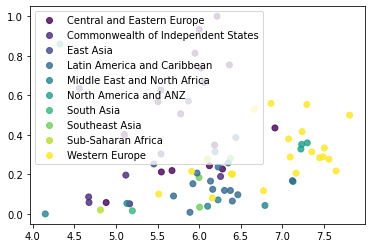

In [72]:
labels, index = np.unique(suicides_score_df['Regional indicator'], return_inverse=True)

fig, ax = plt.subplots()
sc = ax.scatter(suicides_score_df['Ladder score'], suicides_score_df['normalized_rate'], marker = 'o', c = index, alpha = 0.8)
ax.legend(sc.legend_elements()[0], labels)
plt.show()

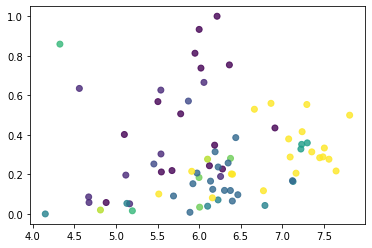

In [73]:
labels, index = np.unique(suicides_score_df['Regional indicator'], return_inverse=True)

fig, ax = plt.subplots()
sc = ax.scatter(suicides_score_df['Ladder score'], suicides_score_df['normalized_rate'], marker = 'o', c = index, alpha = 0.8)

plt.show()

The graph seems to show to some degree that countries within the same regions occupy the same areas on the scatterplot. Countries from Western Europe have high happiness scores but tend towards medium suicide rates. In contrast, some asian countries occupy areas with lower happiness scores but also much lower suicide rates, with a few exceptions like Japan and Korea.

# Insights and Conclusions

*Clearly state your insights and conclusions from the
data to answer each research question you have defined. Make sure that all
conclusions are backed up with statistical evidence when necessary.*

There's some interesting association between the `Social Support`, `Freedom to make life choices` and `Perception to corruption` variables with being in the struggling area of the cantril ladder (3 > ladder score >= 6).

The following rules have surprisingly high confidence of greater than `90%`:

* `Struggling area` `->` `Social Support`, `Freedom to make life choices`, `Perception to corruption`
* `Social Support`, `Freedom to make life choices`, `Struggling area` `->` `Perception to corruption`
* `Social Support`, `Perception to corruption`, `Struggling area` `->` `Freedom to make life choices` 
* `Freedom to make life choices` , `Perception to corruption`, `Struggling area` `->` `Social Support`


The second question provides insight into how culture might have more of an impact on how people would react to their level of happiness. In the exploratory analysis, no significant relationship between suicide and happiness could be found despite suicide commonly being associated with depression. In the attempt to answer the second research question, it can be seen that certain regions have higher tendencies towards suicide than others. For this case study we conclude that culture may be more involved with higher or lower suicide rates. 